In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import shap

In [2]:
df = pd.read_csv(r"C:\Users\User\Documents\Data Science Practice\Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
dummies = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])
dummies

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,True,False,False,True,False,True,False,False,False
1,False,False,True,True,False,True,False,False,False
2,True,False,False,True,False,True,False,False,False
3,True,False,False,True,False,False,True,False,False
4,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
9995,True,False,False,False,True,True,False,False,False
9996,True,False,False,False,True,False,False,True,False
9997,True,False,False,True,False,False,False,False,True
9998,False,True,False,False,True,False,True,False,False


In [4]:
dummies = dummies.replace({True: 1, False: 0})
dummies

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,0,0,1,0,1,0,0,0
1,0,0,1,1,0,1,0,0,0
2,1,0,0,1,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0
4,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,1,0,0,0
9996,1,0,0,0,1,0,0,1,0
9997,1,0,0,1,0,0,0,0,1
9998,0,1,0,0,1,0,1,0,0


In [5]:
df1 = df.drop(['Geography', 'RowNumber', 'Gender', 'CustomerId', 'Surname', 'Card Type'], axis=1)

In [6]:
df = df1.join(dummies)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,...,300,1,0,0,0,1,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,...,771,1,0,0,0,1,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,...,564,1,0,0,1,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,...,339,0,1,0,0,1,0,1,0,0


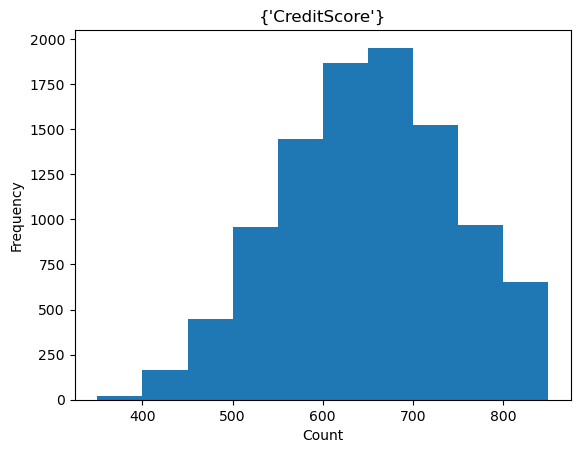

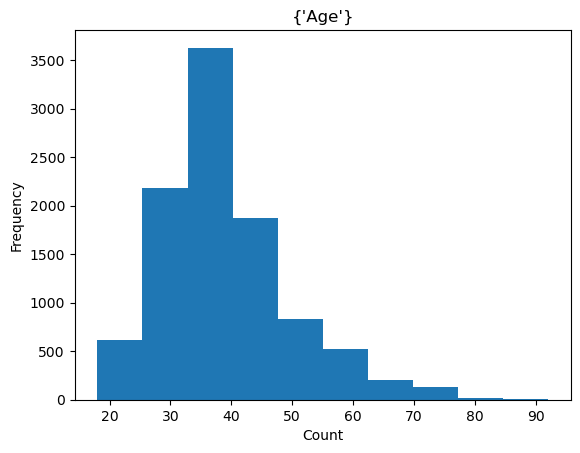

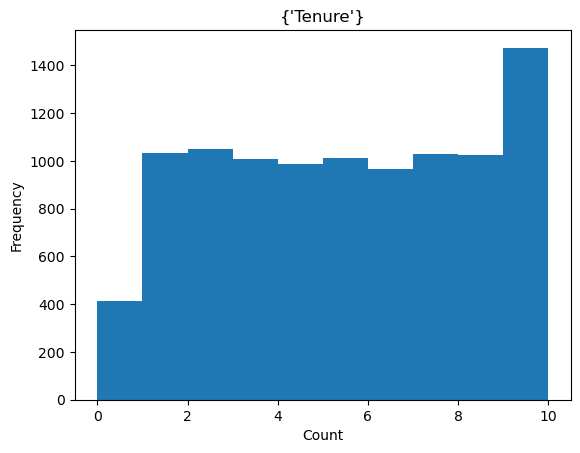

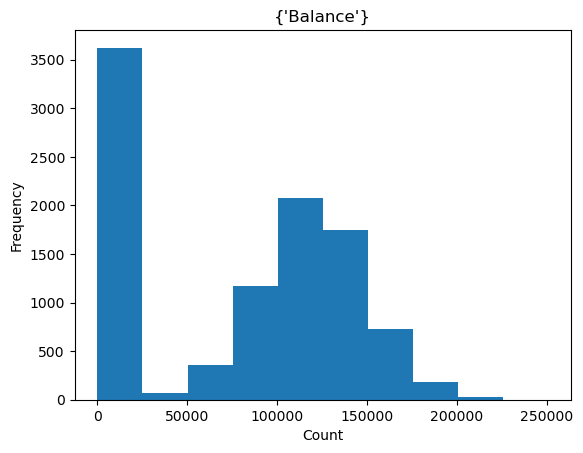

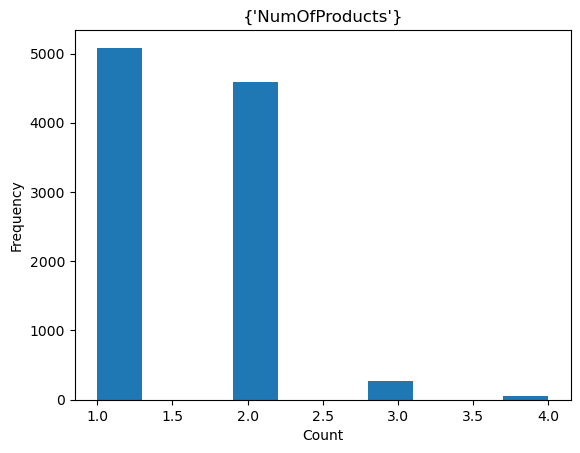

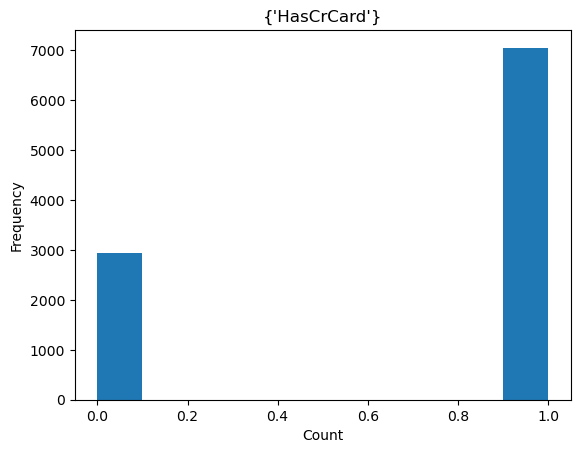

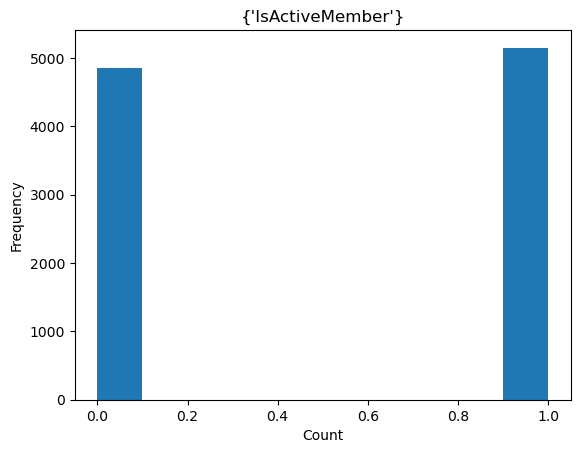

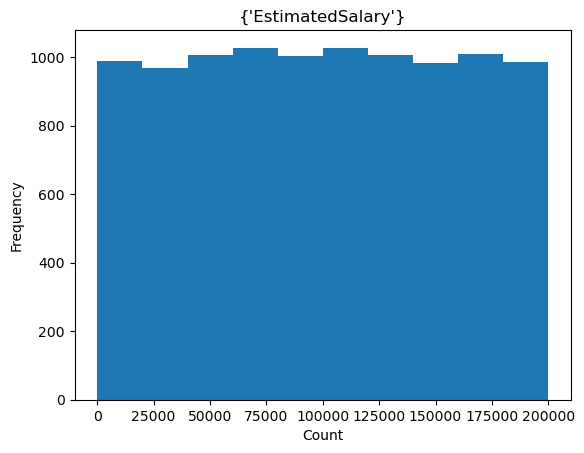

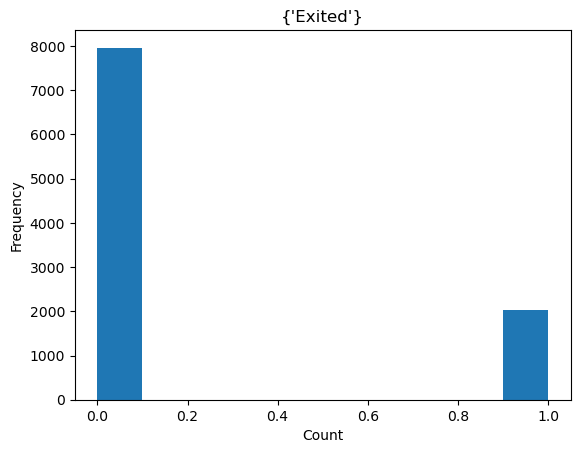

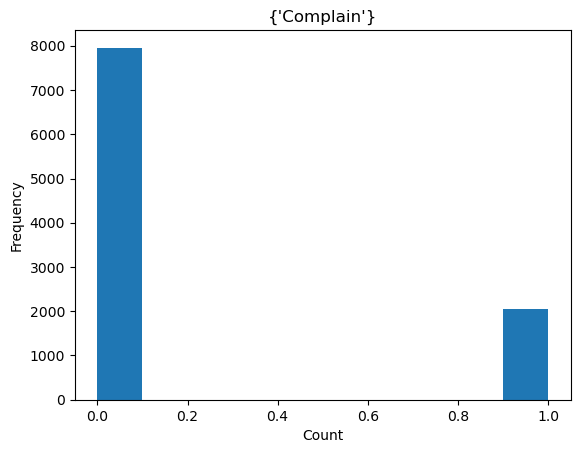

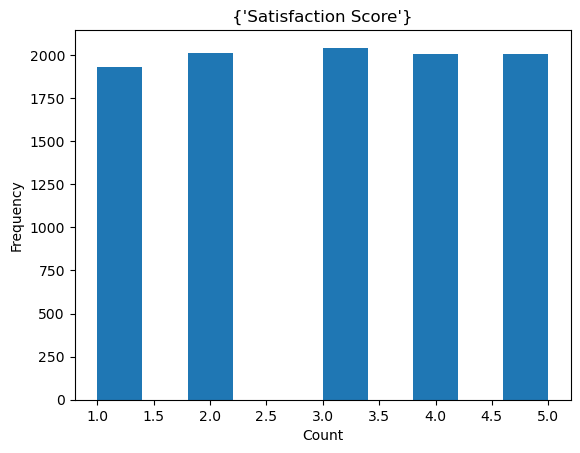

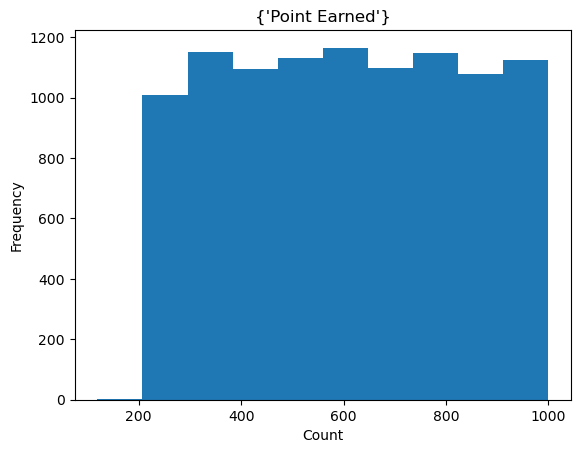

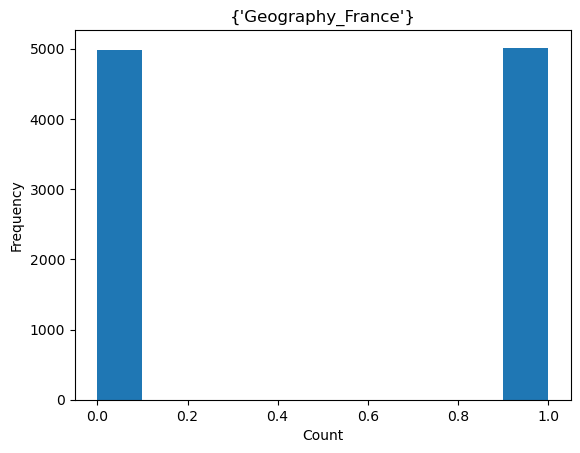

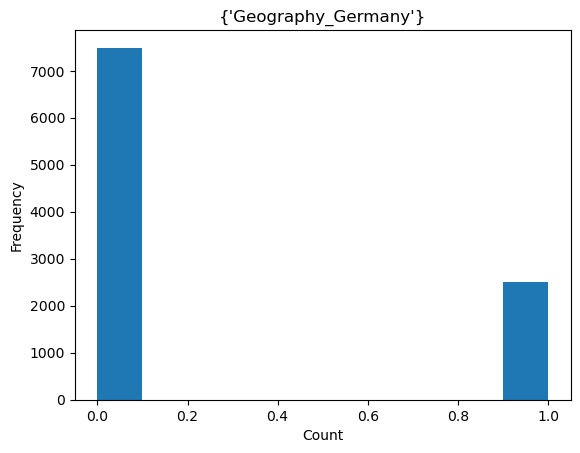

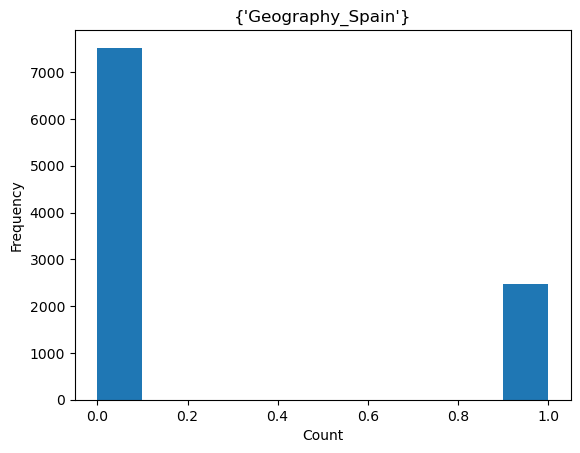

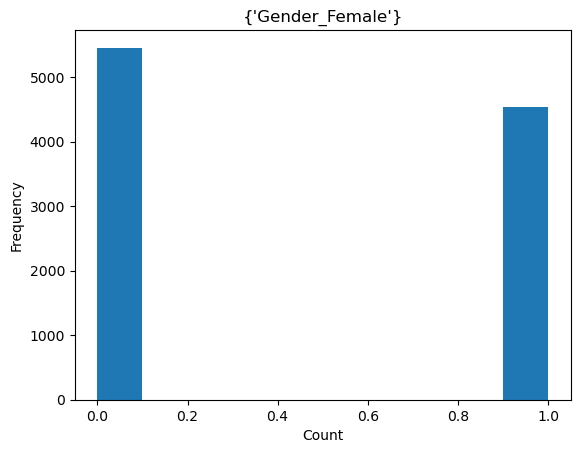

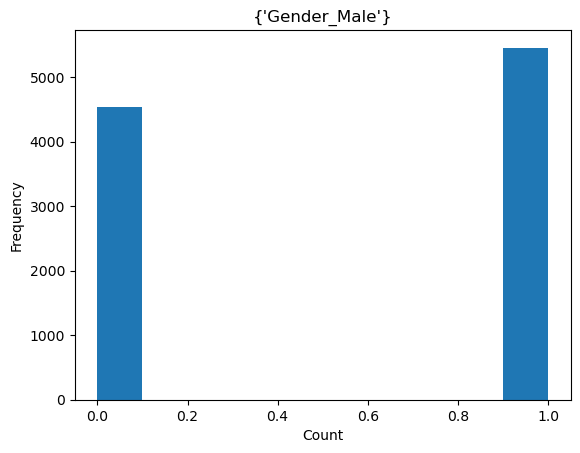

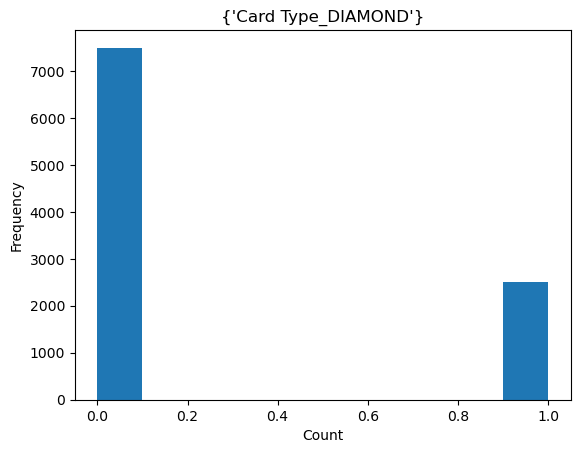

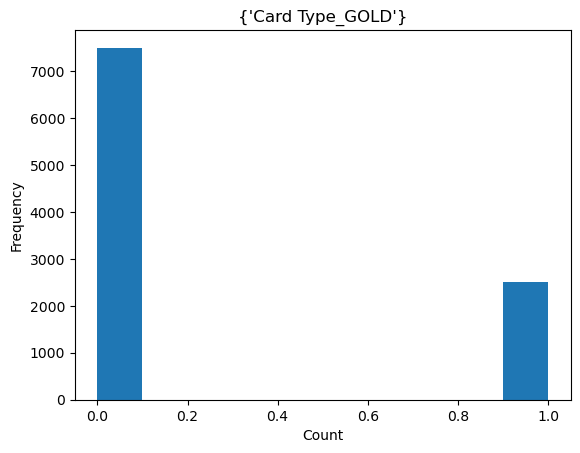

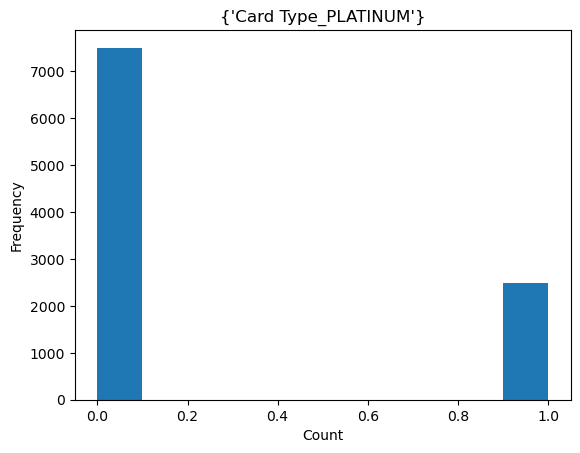

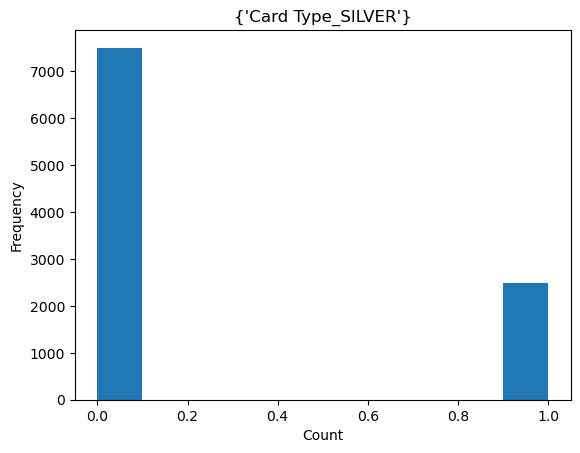

In [7]:
for i in df.columns:
    plt.hist(df[i])
    plt.ylabel('Frequency')
    plt.xlabel('Count')
    plt.title({i})
    plt.show()

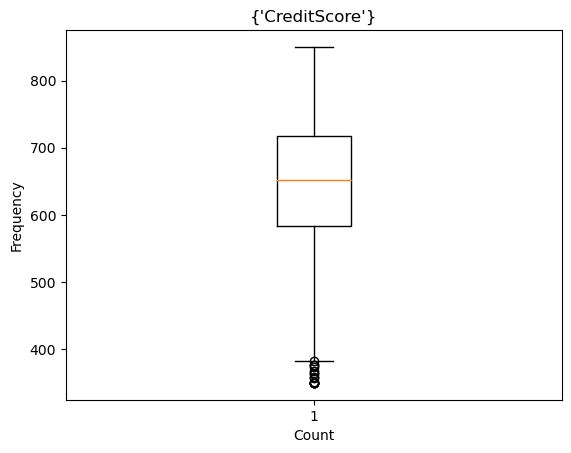

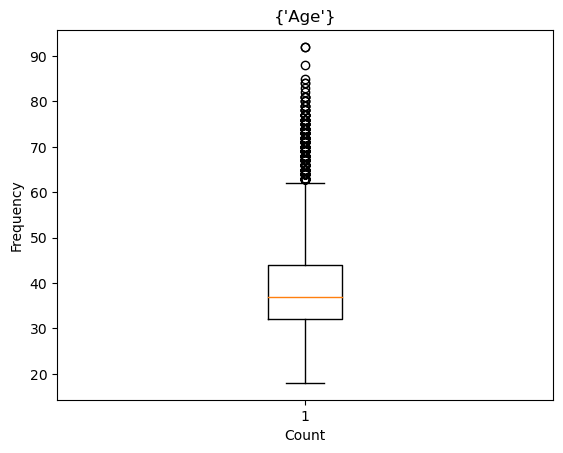

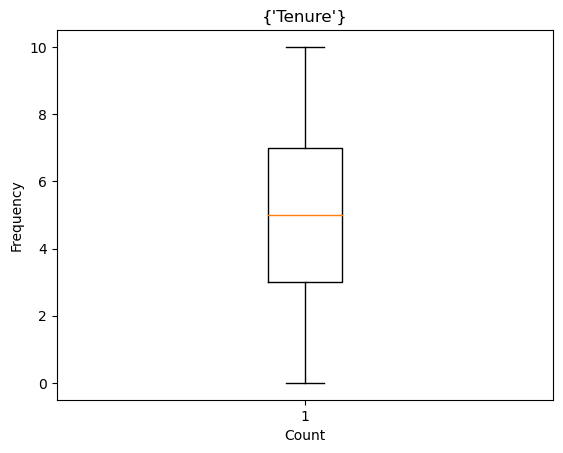

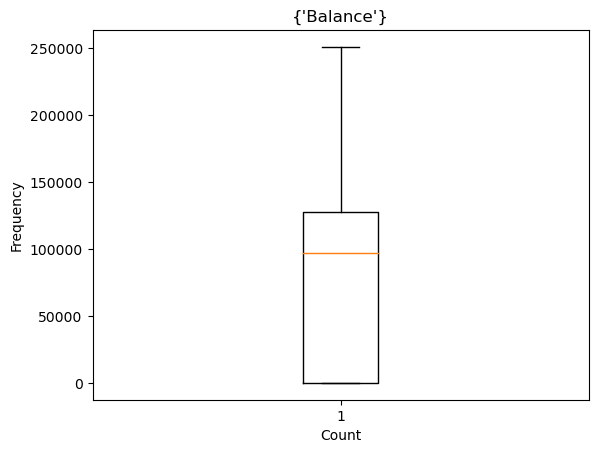

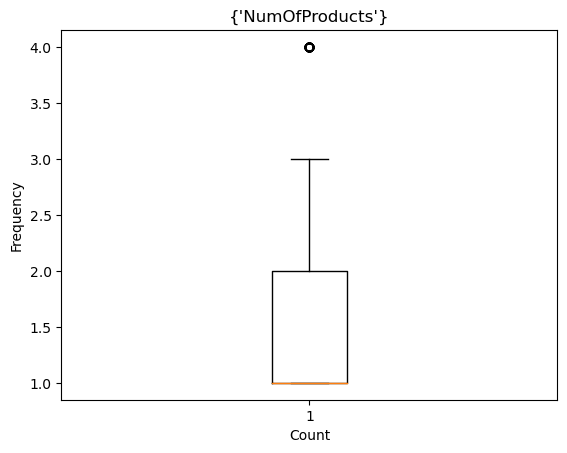

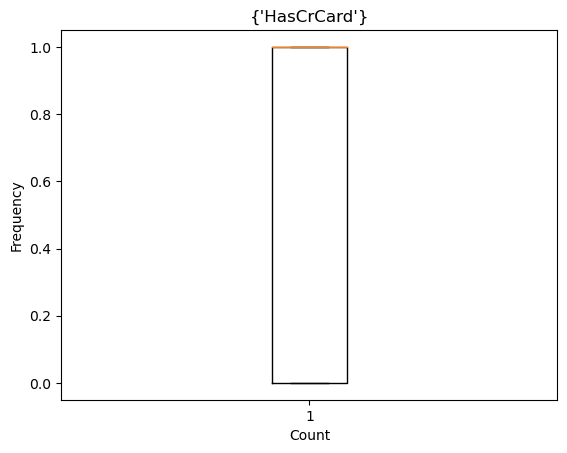

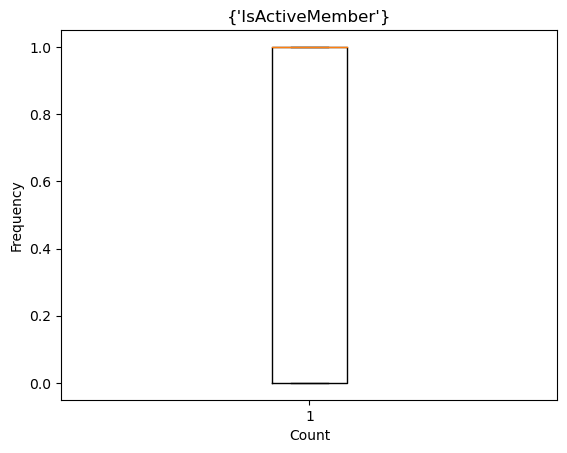

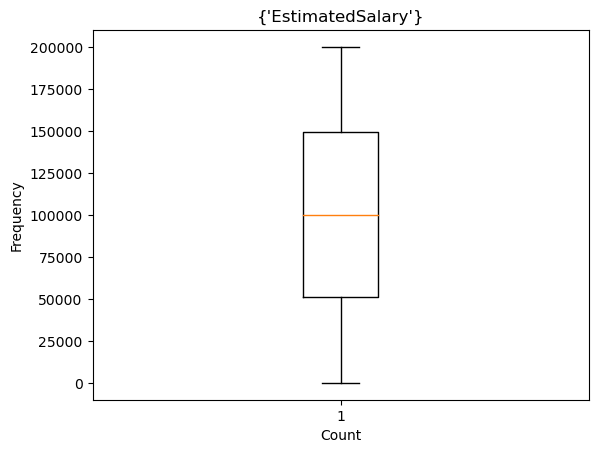

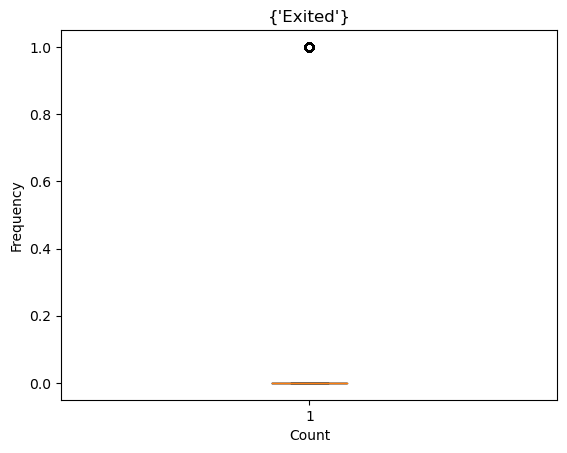

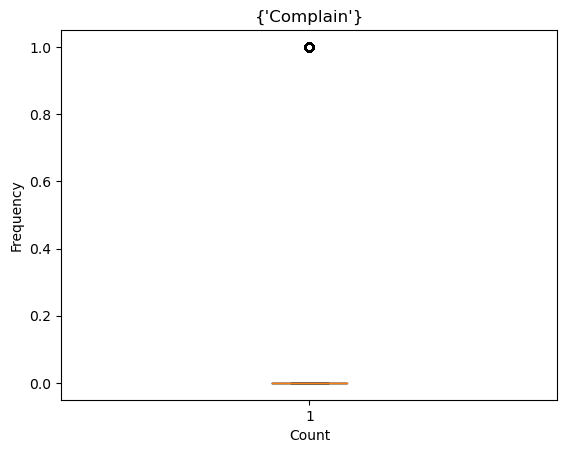

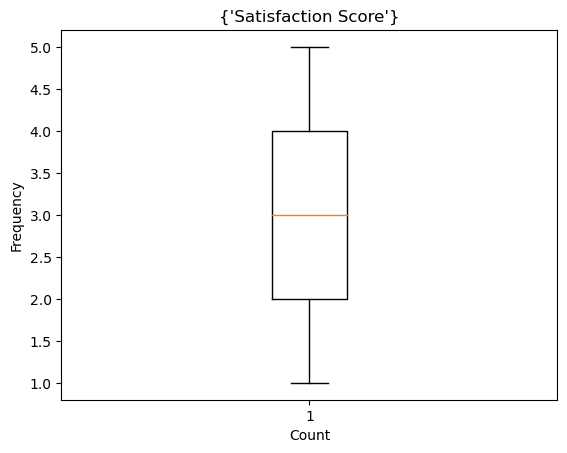

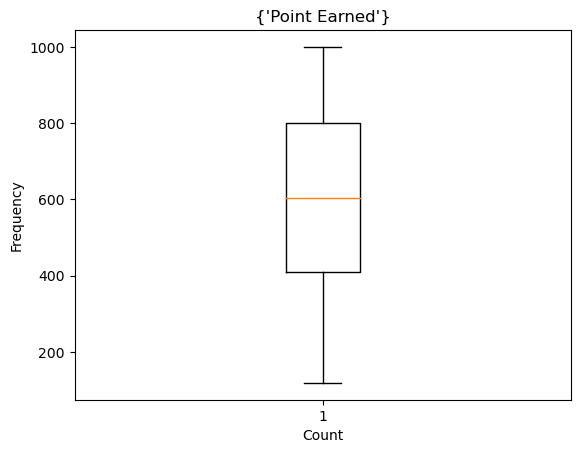

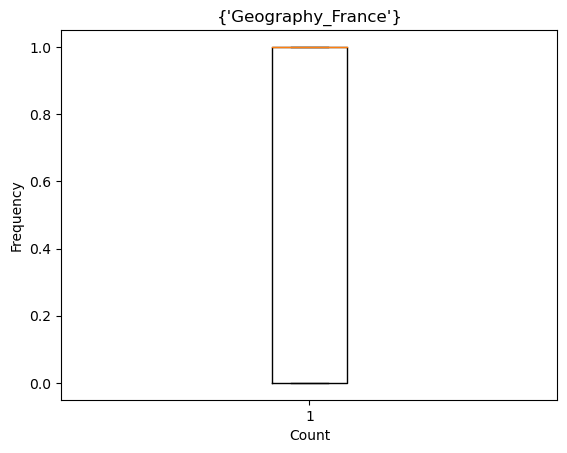

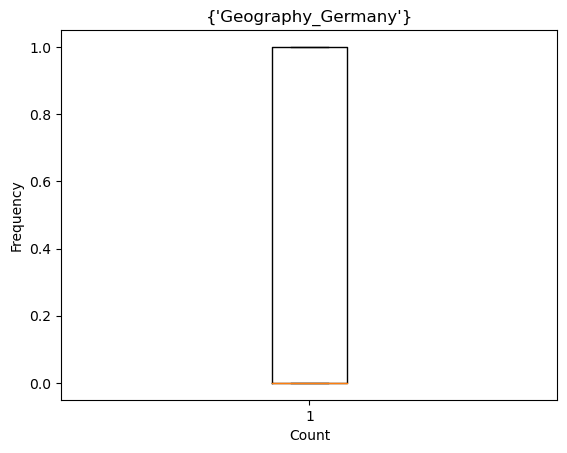

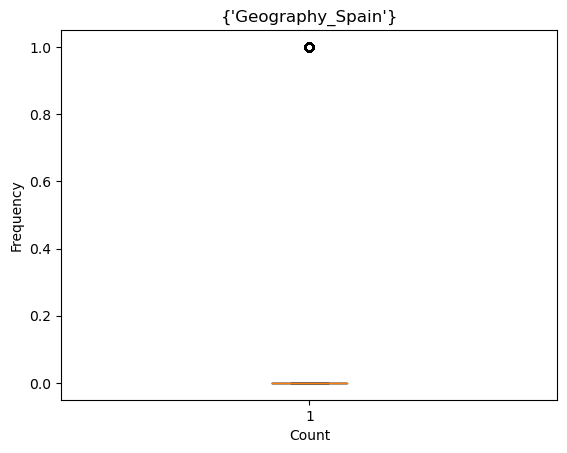

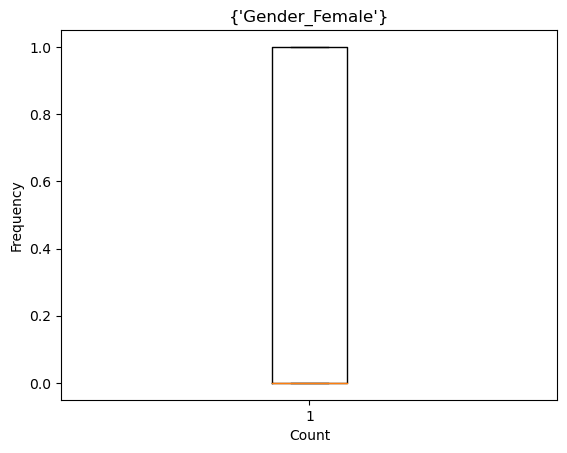

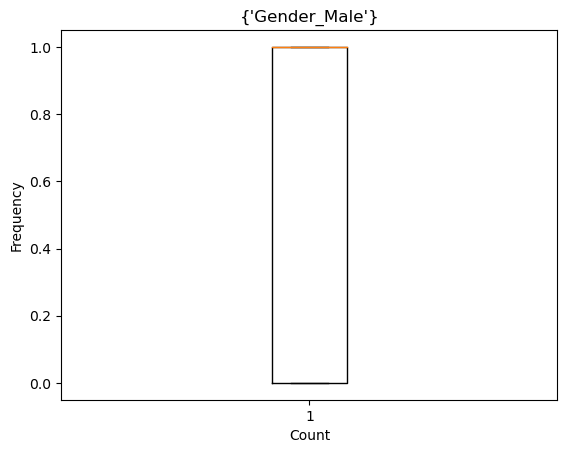

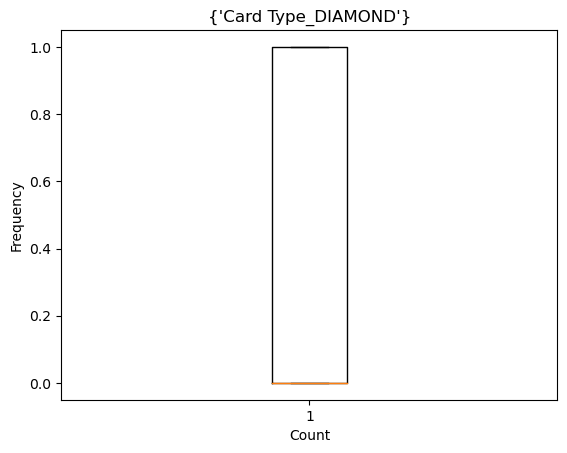

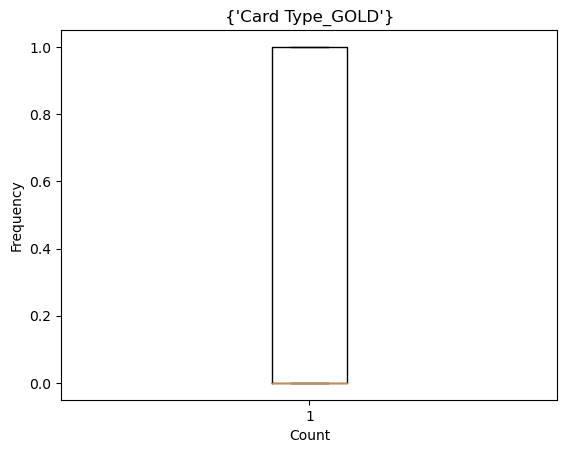

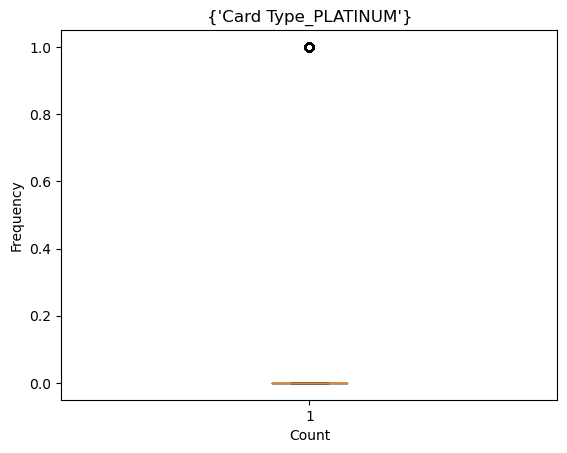

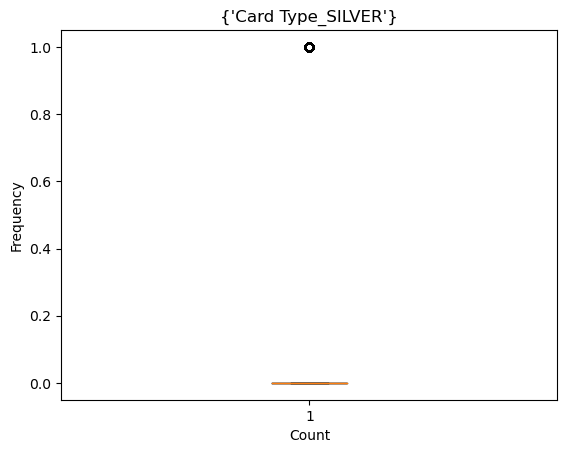

In [8]:
for i in df.columns:
    plt.boxplot(df[i])
    plt.ylabel('Frequency')
    plt.xlabel('Count')
    plt.title({i})
    plt.show()

In [9]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)

In [11]:
model = Sequential()
model.add(Dense(12, input_shape=(20, ), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=25, batch_size=10)

Epoch 1/25


670/670 [==============================] - 3s 3ms/step - loss: 425.5883 - accuracy: 0.6469
Epoch 2/25
670/670 [==============================] - 2s 2ms/step - loss: 32.2007 - accuracy: 0.6781
Epoch 3/25
670/670 [==============================] - 2s 3ms/step - loss: 25.5308 - accuracy: 0.6751
Epoch 4/25
670/670 [==============================] - 2s 3ms/step - loss: 17.5876 - accuracy: 0.6813
Epoch 5/25
670/670 [==============================] - 2s 3ms/step - loss: 18.3662 - accuracy: 0.6827
Epoch 6/25
670/670 [==============================] - 2s 3ms/step - loss: 22.4357 - accuracy: 0.6936
Epoch 7/25
670/670 [==============================] - 2s 3ms/step - loss: 14.2364 - accuracy: 0.6993
Epoch 8/25
670/670 [==============================] - 2s 3ms/step - loss: 16.9989 - accuracy: 0.6943
Epoch 9/25
670/670 [==============================] - 2s 3ms/step - loss: 16.5810 - accuracy: 0.6858
Epoch 10/25
670/670 [==============================] - 2s 3ms/step - loss: 16.6321 - acc

In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


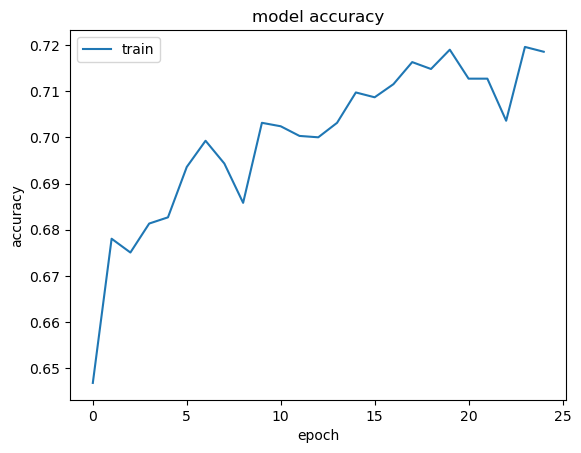

In [20]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

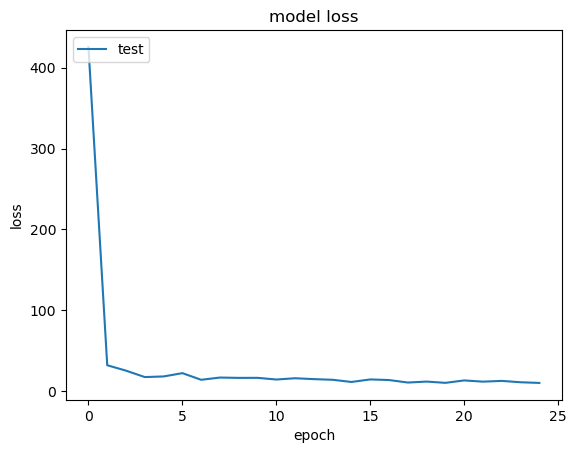

In [21]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()